Dados consolidados carregados para análise!
   id_pedido  id_cliente data_pedido  valor_total  id_produto_associado  \
0          1        1061  2023-10-29      2770.21                   928   
1          2         199  2023-02-27       357.21                   473   
2          3        2675  2024-11-07      4928.99                   401   
3          4        1433  2024-04-09       680.26                   768   
4          5        1704  2024-02-06       832.94                   513   

   nome_cliente            email_cliente     pais  id_produto  \
0  Cliente 1061  cliente1061@exemplo.com     Peru         928   
1   Cliente 199   cliente199@exemplo.com  Espanha         473   
2  Cliente 2675  cliente2675@exemplo.com    Chile         401   
3  Cliente 1433  cliente1433@exemplo.com     Peru         768   
4  Cliente 1704  cliente1704@exemplo.com   México         513   

  produto_associado_nome produto_associado_categoria  produto_associado_preco  
0            Produto 928          

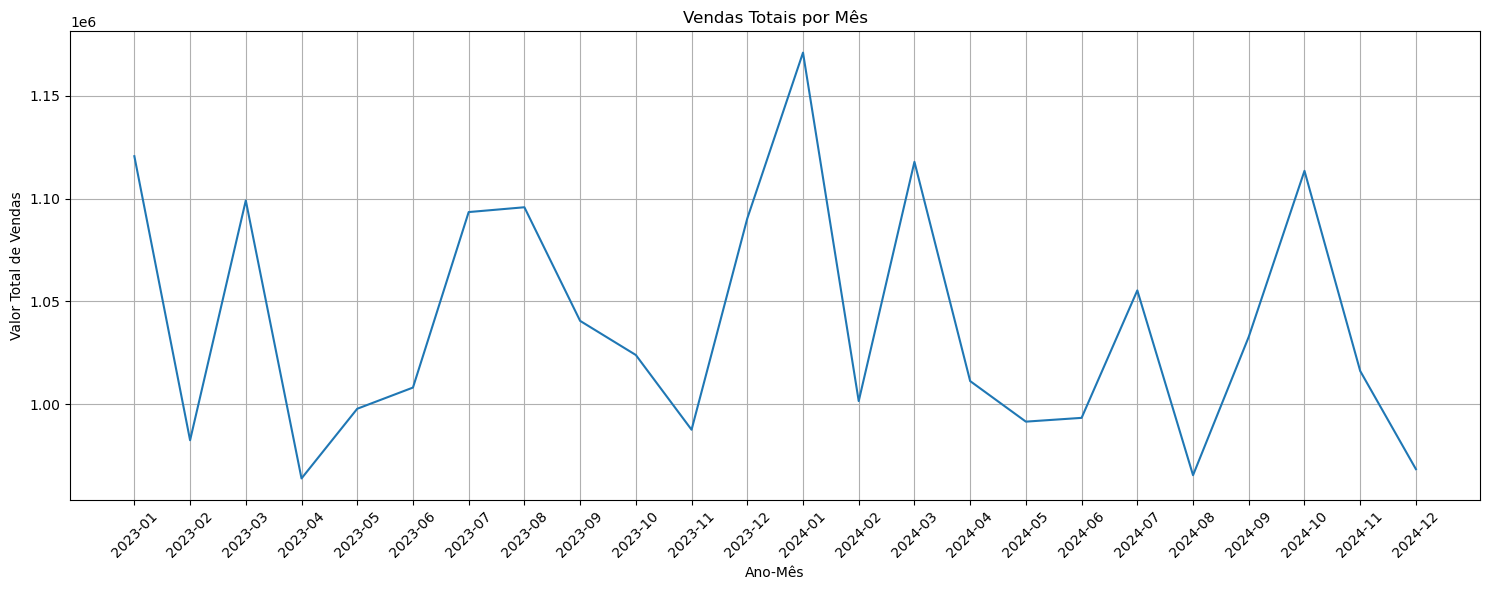

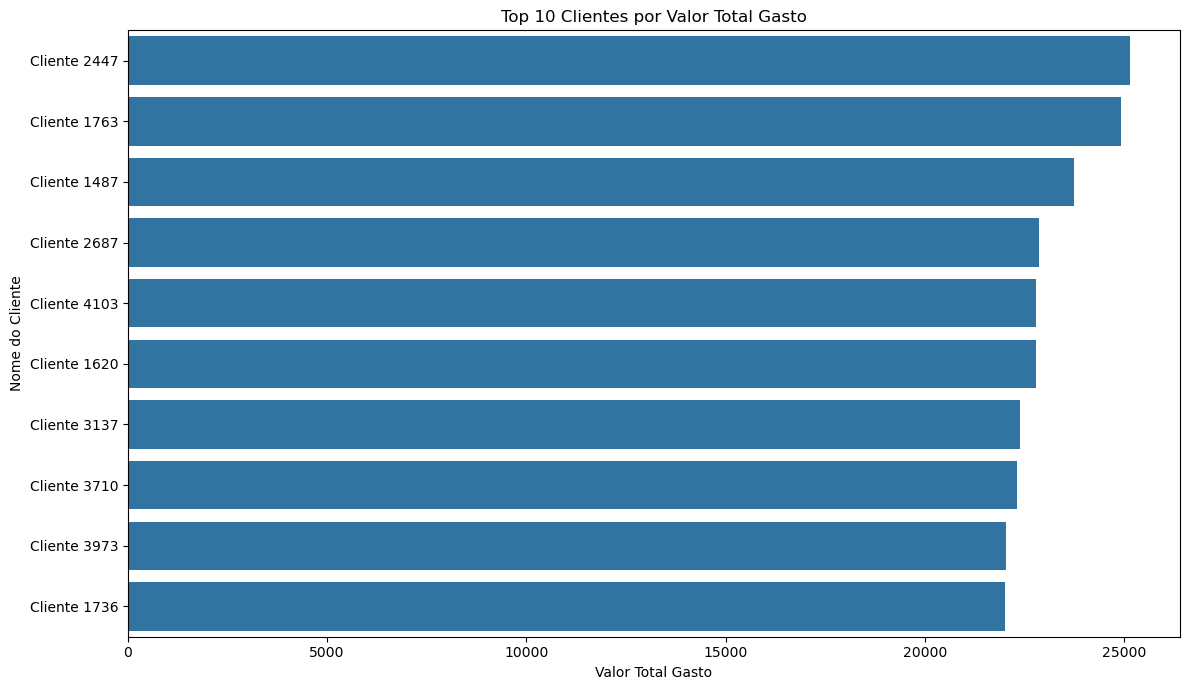

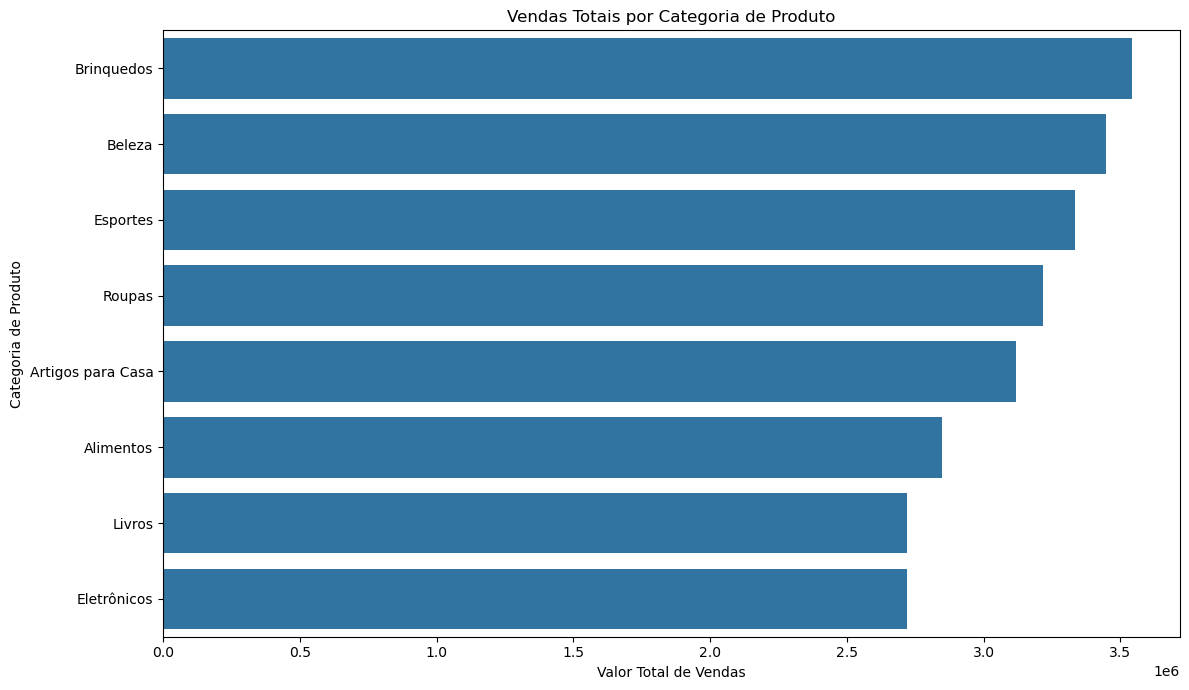

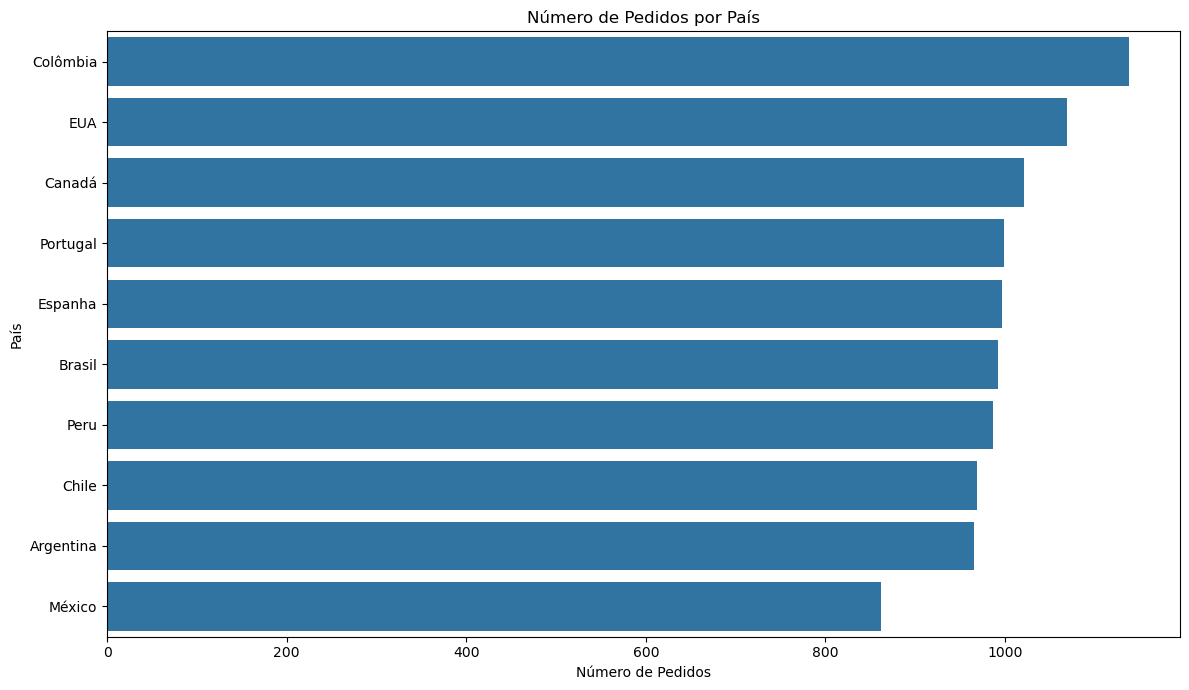


Análise e Visualização Concluídas!


In [1]:

# Análise e Visualização de Dados de E-commerce

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Caminho para os dados consolidados
processed_data_path = os.path.join('..', 'data', 'processed')
consolidated_file = os.path.join(processed_data_path, 'dados_ecommerce_consolidados.csv')

# Carregar os dados consolidados
df_consolidado = pd.read_csv(consolidated_file)

# Converter 'data_pedido' para datetime, pois foi salvo como string
df_consolidado['data_pedido'] = pd.to_datetime(df_consolidado['data_pedido'])

print("Dados consolidados carregados para análise!")
print(df_consolidado.head())

# 1. Análises de Vendas por Período
df_consolidado['ano_mes'] = df_consolidado['data_pedido'].dt.to_period('M')
vendas_mensais = df_consolidado.groupby('ano_mes')['valor_total'].sum().reset_index()
vendas_mensais['ano_mes'] = vendas_mensais['ano_mes'].astype(str)  # Para plotar como string

plt.figure(figsize=(15, 6))
sns.lineplot(x='ano_mes', y='valor_total', data=vendas_mensais)
plt.title('Vendas Totais por Mês')
plt.xlabel('Ano-Mês')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Top 10 Clientes por Valor Total Gasto
top_clientes = df_consolidado.groupby('nome_cliente')['valor_total'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='valor_total', y='nome_cliente', data=top_clientes)
plt.title('Top 10 Clientes por Valor Total Gasto')
plt.xlabel('Valor Total Gasto')
plt.ylabel('Nome do Cliente')
plt.tight_layout()
plt.show()

# 3. Vendas por Categoria de Produto
vendas_por_categoria = df_consolidado.groupby('produto_associado_categoria')['valor_total'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='valor_total', y='produto_associado_categoria', data=vendas_por_categoria)
plt.title('Vendas Totais por Categoria de Produto')
plt.xlabel('Valor Total de Vendas')
plt.ylabel('Categoria de Produto')
plt.tight_layout()
plt.show()

# 4. Número de Pedidos por País
pedidos_por_pais = df_consolidado['pais'].value_counts().reset_index()
pedidos_por_pais.columns = ['Pais', 'Numero_Pedidos']

plt.figure(figsize=(12, 7))
sns.barplot(x='Numero_Pedidos', y='Pais', data=pedidos_por_pais)
plt.title('Número de Pedidos por País')
plt.xlabel('Número de Pedidos')
plt.ylabel('País')
plt.tight_layout()
plt.show()

print("\nAnálise e Visualização Concluídas!")
